In [ ]:
# Install Miniconda
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

# Add conda to PATH
import sys
sys.path.append('/usr/local/lib/python3.10/site-packages')


--2025-11-01 14:13:13--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156323998 (149M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 149.08M   235MB/s    in 0.6s    

2025-11-01 14:13:13 (235 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [156323998/156323998]

PREFIX=/usr/local
Unpacking bootstrapper...
Unpacking payload...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please

In [ ]:
!git clone https://github.com/autonomousvision/stylegan-xl.git
%cd stylegan-xl
!head environment.yml  # optional: inspect dependencies


Cloning into 'stylegan-xl'...
remote: Enumerating objects: 298, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 298 (delta 99), reused 74 (delta 74), pack-reused 175 (from 1)
Receiving objects: 100% (298/298), 13.86 MiB | 16.68 MiB/s, done.
Resolving deltas: 100% (143/143), done.
/content/stylegan-xl
name: sgxl
channels:
  - pytorch
  - nvidia
dependencies:
  - python >= 3.8
  - pip
  - numpy>=1.20
  - click>=8.0
  - pillow=8.3.1


In [ ]:
# Step 1: Accept Conda ToS for main and R channels
!conda tos accept --channel https://repo.anaconda.com/pkgs/main
!conda tos accept --channel https://repo.anaconda.com/pkgs/r

# Step 2: Create environment from environment.yml
!conda env create -f environment.yml


accepted Terms of Service for https://repo.anaconda.com/pkgs/main
accepted Terms of Service for https://repo.anaconda.com/pkgs/r
accepted Terms of Service for https://repo.anaconda.com/pkgs/r
accepted Terms of Service for https://repo.anaconda.com/pkgs/main
Jupyter detected...
2 channel Terms of Service accepted
Retrieving notices: - \ | / - \ | / - \ | / - \ | / - done
Channels:
 - pytorch
 - nvidia
 - defaults
Platform: linux-64
Solving environment: \ | done

pytorch-1.9.1        | 1.44 GB   | :   0% 0/1 [00:00<?, ?it/s]
cudatoolkit-11.1.74  | 1.19 GB   | :   0% 0/1 [00:00<?, ?it/s]

mkl-2021.4.0         | 142.6 MB  | :   0% 0/1 [00:00<?, ?it/s]


libllvm15-15.0.7     | 35.4 MB   | :   0% 0/1 [00:00<?, ?it/s]



python-3.9.24        | 23.1 MB   | :   0% 0/1 [00:00<?, ?it/s]




scipy-1.7.1          | 16.9 MB   | :   0% 0/1 [00:00<?, ?it/s]





qtdeclarative-6.9.2  | 16.7 MB   | :   0% 0/1 [00:00<?, ?it/s]






qtbase-6.9.2         | 11.2 MB   |

In [ ]:
!conda env list



# conda environments:
#
# *  -> active
# + -> frozen
base                     /usr/local
sgxl                     /usr/local/envs/sgxl



In [ ]:
!conda run -n sgxl pip install ftfy lpips pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 80.1 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3




In [ ]:
%%writefile run_stylegan_sample.py

import torch, dnnlib, legacy
from PIL import Image
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_path = '/content/drive/MyDrive/IE643/CourseProject/imagenet256.pkl'

# Load generator
with open(model_path, 'rb') as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)
G.eval()

# Generate random latent
z = torch.randn([1, G.z_dim], device=device)

# ImageNet is class-conditional: pick a class (0–999)
num_classes = 1000
class_idx = 0  # e.g., class 0
c = torch.zeros([1, num_classes], device=device)
c[0, class_idx] = 1.0

# Generate image
img = G(z, c, truncation_psi=0.7)
img = (img.clamp(-1,1)+1)*127.5
img = img.permute(0,2,3,1).cpu().numpy().astype(np.uint8)[0]
Image.fromarray(img).save('sample_generated.jpg')
print('✅ Sample image saved as sample_generated.jpg')


Overwriting run_stylegan_sample.py


In [ ]:
!conda run -n sgxl python run_stylegan_sample.py


Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
✅ Sample image saved as sample_generated.jpg

W1101 14:29:50.468779 5549 site-packages/torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W1101 14:29:50.468779 5549 site-packages/torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'] to specific architectures.
W1101 14:30:17.902646 5549 site-packages/torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W1101 14:30:17.902646 5549 site-packages/torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'] to specific architectures.



In [ ]:
from google.colab import files
uploaded = files.upload()
# Upload:
# 1. style_image.jpg → extremely shifted/noisy image
# 2. clean_image.jpg → clean content image


Saving hidemotionblur.png to hidemotionblur (1).png
Saving clean.jpg to clean.jpg


In [ ]:
from PIL import Image
from torchvision import transforms
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

style_path = "/content/stylegan-xl/hidemotionblur.png"
content_path = "/content/stylegan-xl/clean.jpg"

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

style_img = transform(Image.open(style_path).convert("RGB")).unsqueeze(0).to(device)
content_img = transform(Image.open(content_path).convert("RGB")).unsqueeze(0).to(device)


In [ ]:
def project_to_latent(G, target, steps=200, lr=0.05):
    """
    Project an image to StyleGAN latent space using MSE loss.
    """
    w = torch.randn([1, G.z_dim], device=device, requires_grad=True)
    optimizer = torch.optim.Adam([w], lr=lr)
    for i in range(steps):
        synth = G(w, None, truncation_psi=1, noise_mode='const')
        loss = torch.mean((synth - target)**2)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 50 == 0:
            print(f"Step {i}/{steps} — Loss: {loss.item():.4f}")
    return w.detach()


In [ ]:
def style_mix(G, w_content, w_style, strength=0.6):
    """
    Mix latents: lower layers from style, higher layers from content.
    """
    wc = G.mapping(w_content, None)
    ws = G.mapping(w_style, None)
    mixed = wc.clone()
    mixed[:, :5] = (1 - strength) * wc[:, :5] + strength * ws[:, :5]
    return mixed


In [ ]:
!conda run -n sgxl pip install lpips


In [ ]:
!pip install lpips

  Using cached lpips-0.1.4-py3-none-any.whl.metadata (10 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.10.0-py3-none-any.whl.metadata (10 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cufft_cu12-11.3.3.83-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_curand_cu12-10.3.9.90-py3-none-manylinux_2_27_x86_64.wh

In [ ]:
%%writefile style_transfer.py
import torch
from PIL import Image
from torchvision import transforms
import numpy as np
import legacy, dnnlib
import lpips

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# -----------------------
# PARAMETERS
# -----------------------
model_path = '/content/drive/MyDrive/IE643/CourseProject/imagenet256.pkl'   # pretrained generator
content_path = '/content/stylegan-xl/clean.jpg'     # clean content image
style_path = '/content/stylegan-xl/hidemotionblur.png'         # extreme / noisy image
output_path = 'final_image.jpg'  # output image
latent_steps = 200
latent_lr = 0.05
style_strength = 0.6

# -----------------------
# TRANSFORMS
# -----------------------
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

content_img = transform(Image.open(content_path).convert('RGB')).unsqueeze(0).to(device)
style_img = transform(Image.open(style_path).convert('RGB')).unsqueeze(0).to(device)

# -----------------------
# LOAD GENERATOR
# -----------------------
with open(model_path, 'rb') as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)
G.eval()
print("✅ Generator loaded")

# -----------------------
# DUMMY CLASS LABEL (for ImageNet model)
# -----------------------
# StyleGAN-XL trained on ImageNet expects 1000D class embeddings
# We’ll use a zero vector => unconditional generation
c_zero = torch.zeros([1, G.c_dim], device=device)

# -----------------------
# HELPER FUNCTIONS
# -----------------------
def synth_from_z(G, z, c=None, truncation_psi=1.0):
    """Generate image from random latent z"""
    if c is None:
        c = c_zero
    ws = G.mapping(z, c)
    img = G.synthesis(ws, noise_mode='const')
    return img

def project_to_latent(G, target, steps=200, lr=0.05):
    """Project an image to StyleGAN latent space"""
    z = torch.randn([1, G.z_dim], device=device, requires_grad=True)
    optimizer = torch.optim.Adam([z], lr=lr)
    for i in range(steps):
        synth = synth_from_z(G, z, c_zero)
        loss = torch.mean((synth - target)**2)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 50 == 0:
            print(f"Step {i}/{steps} — Loss: {loss.item():.4f}")
    return z.detach()

def style_mix(G, z_content, z_style, strength=0.6):
    """Mix latent codes"""
    ws_content = G.mapping(z_content, c_zero)
    ws_style = G.mapping(z_style, c_zero)
    ws_mixed = ws_content.clone()
    ws_mixed[:, :5] = (1 - strength) * ws_content[:, :5] + strength * ws_style[:, :5]
    return ws_mixed

def latent_to_image(G, ws):
    with torch.no_grad():
        img = G.synthesis(ws, noise_mode='const')
    img = (img.clamp(-1,1)+1)*127.5
    img = img.permute(0,2,3,1).cpu().numpy().astype(np.uint8)[0]
    return Image.fromarray(img)

# -----------------------
# MAIN PIPELINE
# -----------------------
print("Projecting content image to latent space...")
z_content = project_to_latent(G, content_img, steps=latent_steps, lr=latent_lr)
print("Projecting style image to latent space...")
z_style = project_to_latent(G, style_img, steps=latent_steps, lr=latent_lr)

ws_mixed = style_mix(G, z_content, z_style, strength=style_strength)
final_img = latent_to_image(G, ws_mixed)
final_img.save(output_path)
print(f"✅ Final style-transferred image saved as {output_path}")

lpips_fn = lpips.LPIPS(net='vgg').to(device)
styled_tensor = transform(final_img).unsqueeze(0).to(device)
dist = lpips_fn(style_img, styled_tensor)
print(f"LPIPS distance (style similarity): {dist.item():.4f}")


Overwriting style_transfer.py


In [ ]:
!conda run -n sgxl python style_transfer.py


✅ Generator loaded
Projecting content image to latent space...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
Step 0/200 — Loss: 0.4744
Step 50/200 — Loss: 0.1408
Step 100/200 — Loss: 0.1289
Step 150/200 — Loss: 0.1214
Projecting style image to latent space...
Step 0/200 — Loss: 0.4640
Step 50/200 — Loss: 0.2256
Step 100/200 — Loss: 0.2056
Step 150/200 — Loss: 0.1976
✅ Final style-transferred image saved as final_image.jpg
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
Loading model from: /usr/local/envs/sgxl/lib/python3.9/site-packages/lpips/weights/v0.1/vgg.pth
LPIPS distance (style similarity): 0.7486

W1101 14:49:46.178663 10899 site-packages/torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W1

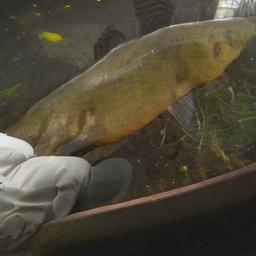

In [ ]:
from IPython.display import Image as showImage
showImage(filename='final_image.jpg')
